In [1]:
%matplotlib inline

import pylab
import scipy
from astropy.io import fits
import scipy.fftpack as pf
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #plot library
def init_plotting():
    plt.rcParams['figure.figsize'] = (14.0,8.0)
    plt.rcParams['font.size'] = 10
    #plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 2*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()


In [2]:
#abrindo a imagem
caminho  = '/home/brambila/UFRJ/TDA/projeto_2_tda/n4736_optical.fits'
img = fits.getdata(caminho)
img = scipy.array(img,dtype='Float64')

#gerando os coeficientes de furier da imagens
img_hat = pf.fft2(img) #usando uma transformada 2D

#desloca os coeficientes de baixa frequencia para a região central da matriz
img_hat_shift = np.fft.fftshift(img_hat)

#imagem mostrando a contracao dos coeficientes de baixa 
magnitude_spectrum = 20*np.log(np.abs(img_hat_shift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


/home/brambila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


In [7]:
rows, cols = img.shape #quantidade de linhas e colunas

#criando o filtro passa baixa
mask = img_hat_shift     #copio a matriz de coeficientes para ter uma matriz com a mesma forma que a de coeficientes
mask = mask*0     #faz essa matriz ser de valores zero
crow, ccol = int(rows/2) , int(cols/2)     #define a região central da matriz

#Aqui o usuario determina quantas linhas acima e abaixo da linha central devem ser filtradas e 
#quantas colunas a esquerda e direita da coluna central devem ser filtradas.
#Alem disso, ao determinal igualda 1 tem-se um filtro passa baixa, se a iguldade for 0, tem-se um filtro passa alta
mask[crow-20:crow+20, ccol-20:ccol+20] = 1     # faz os valores da região central ser igual a 1

img_hat_shift = mask * img_hat_shift     # multiplica as matrizes de coeficiente pela mascara, 
                                         # assim zerando os valores fora da região central e mantendo os valores centrais
                                         # desse modo, apenas os coeficientes de baixa frequencia serão considerados na 
                                         # transformada inversa
img_hat_ishift = np.fft.ifftshift(img_hat_shift)     # volta os coeficientes para suas posições originais
img_back = np.fft.ifft2(img_hat_ishift)     # faz a matriz inversa da nova matriz de coeficientes   
img_back = np.abs(img_back)     # pega apenas os valores reais, descartando a parte imaginária

subtração = img - img_back     # diferença entre a imagem original e a pós filtragem

(<matplotlib.text.Text at 0xa7d77f2c>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

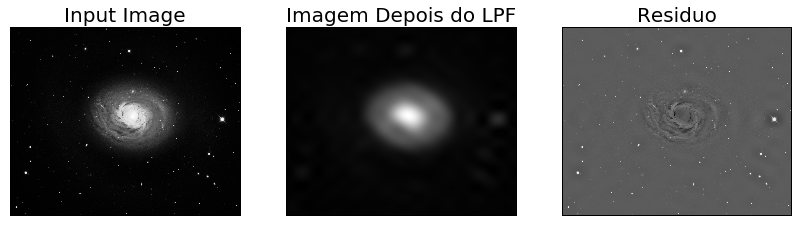

In [9]:
#plot das imagens
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem Depois do LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(subtração, cmap = 'gray')
plt.title('Residuo'), plt.xticks([]), plt.yticks([])



